In [1]:
import pandas as pd
import numpy as np
from decisionTree import DecisionTree
from randomForestt import RandomForest

In [2]:
%store -r total

In [3]:
test_df = total.head(555719)
train_df = total.tail(len(total) - 555719)

In [4]:
train_df = train_df.sample(n=10000, random_state=42)
test_df = test_df.sample(n=2000, random_state=42)

In [5]:
X_train = train_df.drop(["is_fraud"], axis=1).values #Setting the X to do the split
y_train = train_df["is_fraud"].values # transforming the values in array

X_test = test_df.drop(["is_fraud"], axis=1).values #Setting the X to do the split
y_test = test_df["is_fraud"].values # transforming the values in array

In [6]:
unique_values_train, counts_train = np.unique(y_train, return_counts=True)
print("Unique values in y_train:", unique_values_train)
print("Counts of unique values in y_train:", counts_train)

unique_values_test, counts_test = np.unique(y_test, return_counts=True)
print("Unique values in y_test:", unique_values_test)
print("Counts of unique values in y_test:", counts_test)

Unique values in y_train: [0 1]
Counts of unique values in y_train: [9941   59]
Unique values in y_test: [0 1]
Counts of unique values in y_test: [1996    4]


In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [9]:
tree = DecisionTree(max_depth=None, min_samples_split=10, min_samples_leaf=4)
tree.fit(X_train, y_train)

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve, auc

import matplotlib.pyplot as plt

from sklearn.metrics import f1_score

In [11]:

# Make predictions on the test data
y_pred = tree.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.999


Area Under Precision-Recall Curve (AUPR): 0.7505


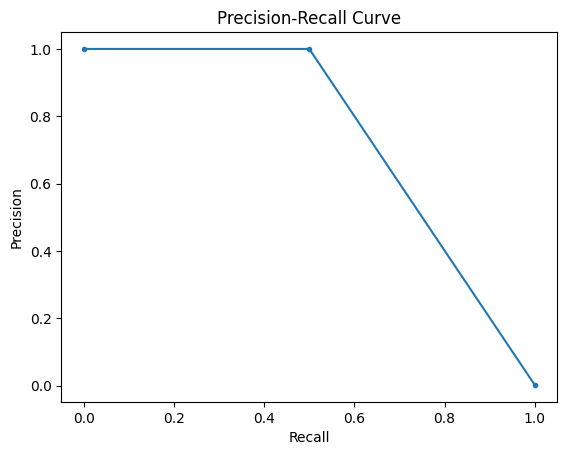

In [12]:

# Step 2: Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Step 3: Plot the Precision-Recall Curve

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Step 4: Compute AUPR
aupr = auc(recall, precision)
print("Area Under Precision-Recall Curve (AUPR):", aupr)

In [13]:

# Assuming y_true contains the true labels and y_pred contains the predicted labels
f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)

F1 Score: 0.6666666666666666


In [23]:
rf_classifier = RandomForest(n_estimators=50,
                                        max_depth=2,
                                        min_samples_split=4,
                                        min_samples_leaf=10)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.998


Area Under Precision-Recall Curve (AUPR): 0.501


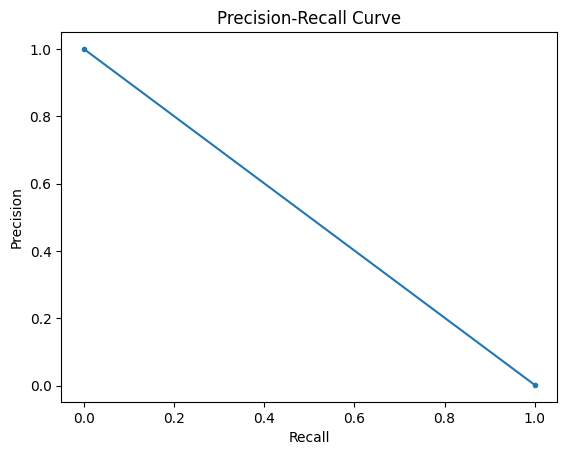

In [24]:

# Step 2: Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Step 3: Plot the Precision-Recall Curve

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Step 4: Compute AUPR
aupr = auc(recall, precision)
print("Area Under Precision-Recall Curve (AUPR):", aupr)

In [25]:
# Assuming y_true contains the true labels and y_pred contains the predicted labels
f1 = f1_score(y_test, y_pred)

print("F1 Score:", f1)

F1 Score: 0.0


In [27]:
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import f1_score


# Function to classify based on threshold
def classify_anomaly_score(score, threshold):
    if score <= threshold:
        return 1  # Fraud
    else:
        return 0  # Normal

# Lists to store results
no_of_trees_list = [50, 100, 150]
sample_splits = [2, 5, 10]
sample_leafs = [1, 2, 5]


# Loop over different values of number of trees and sample size
for no_of_trees in no_of_trees_list:
    aupr_scores = []
    aupr_scores_1 = []
    f1_scores = [] 
    for sample_split in sample_splits:
        for sample_leaf in sample_leafs:

        
            rf_classifier = RandomForest(n_estimators=no_of_trees,
                                        max_depth=None,
                                        min_samples_split=sample_split,
                                        min_samples_leaf=sample_leaf)
            rf_classifier.fit(X_train, y_train)

            # Make predictions
            y_pred = rf_classifier.predict(X_test)

            aupr_score = auc(recall, precision)
            aupr_scores.append(aupr_score)
            
            f1 = f1_score(y_test, y_pred)
            f1_scores.append(f1)

    # Reshape the AUPR scores for plotting
    aupr_scores = np.array(aupr_scores).reshape(len(no_of_trees_list), len(sample_size_list))
    f1_scores = np.array(f1_scores).reshape(len(no_of_trees_list), len(sample_size_list))

    # Plot AUPR scores
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(aupr_scores, cmap='viridis', interpolation='nearest')
    plt.title('AUPR Scores')
    plt.xlabel('Sample Size')
    plt.ylabel('Number of Trees')
    plt.xticks(np.arange(len(sample_splits)), sample_splits)
    plt.yticks(np.arange(len(sample_leafs)), sample_leafs)
    plt.colorbar(label='AUPR Score')
    plt.tight_layout()

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 2)
    plt.imshow(f1_scores, cmap='viridis', interpolation='nearest')
    plt.title('F1 Scores')
    plt.xlabel('Sample Size')
    plt.ylabel('Number of Trees')
    plt.xticks(np.arange(len(sample_splits)), sample_splits)
    plt.yticks(np.arange(len(sample_leafs)), sample_leafs)
    plt.colorbar(label='F1 Score')
    plt.tight_layout()
    plt.show()